# Imports

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (accuracy_score, classification_report,ConfusionMatrixDisplay,confusion_matrix, SCORERS)

# utilities

In [3]:
def give_learning_curve(model,X_train,y_train, scoring= 'f1_macro'):
    n, train_score, val_score = learning_curve(model, 
                                               X_train, 
                                               y_train,
                                               cv=5, 
                                               train_sizes=np.linspace(0.1, 1, 10), 
                                               scoring=scoring)

    lc = pd.DataFrame({'n': n,
                      'train score': train_score.mean(axis=1),
                      'test score': val_score.mean(axis=1)})
    display(lc)
    # plot:
    
    plt.figure(figsize=(8, 5))
    plt.title('Learning Curve')
    
    plt.plot(n, train_score.mean(axis=1), label='train score', color='orange')
    plt.plot(n, val_score.mean(axis=1), label='test score', color='green')
    
    plt.xlabel('n rows')
    plt.ylabel(scoring)
    plt.ylim([0,1.1])
    plt.legend()
    plt.show()
    pass



def give_confusion_report(model,X_test,y_test):
    
    pred_test = model.predict(X_test)
    cm = confusion_matrix(y_test, pred_test)
    
    CM = ConfusionMatrixDisplay(confusion_matrix=cm)
    CM.plot()
    plt.show()
    
    print(classification_report(y_test,pred_test))
    pass 


def give_f_imp(model, X_train):

    f_importance = pd.DataFrame({'feature_names': X_train.columns,
                                 'importance': model.feature_importances_})
    display(f_importance)

    plt.figure(figsize=(8, 5))
    plt.title('Feature importance')
    sns.barplot(data=f_importance, x='feature_names', y='importance')
    plt.xticks(rotation='vertical')
    plt.show()
    pass

In [4]:
data = pd.read_csv('mushrooms_red_pp.csv')
data

,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-size_b,...,bruises_t,gill-spacing_c,gill-spacing_w,population_a,population_c,population_n,population_s,population_v,population_y,class
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,p
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,e
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,e
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,p
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,e
8120,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,e
8121,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,e
8122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,p


# Preprocessing

In [5]:
X = data.copy()
y = X.pop('class')

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, # 0.25 
                                                    random_state=4) # 4 arbirary , can be any integer
print(X_train.shape)
X_test.shape


(6093, 55)


(2031, 55)

# Metrics doc:

[ https://scikit-learn.org/stable/modules/model_evaluation.html ]

## with cross validation

In [7]:
from sklearn.ensemble import RandomForestClassifier

params = {'max_depth':np.arange(1,11,2),'min_samples_leaf':np.arange(2,10,3)}

scoring = 'f1_macro'#'accuracy' # f1_macro, precision_macro, recall_macro

grid = GridSearchCV(RandomForestClassifier()
                    ,param_grid=params
                    ,scoring=scoring)

grid.fit(X_train,y_train)

model = grid.best_estimator_
score = grid.best_score_

display(model)
print(score)



RandomForestClassifier(max_depth=9, min_samples_leaf=2)

1.0


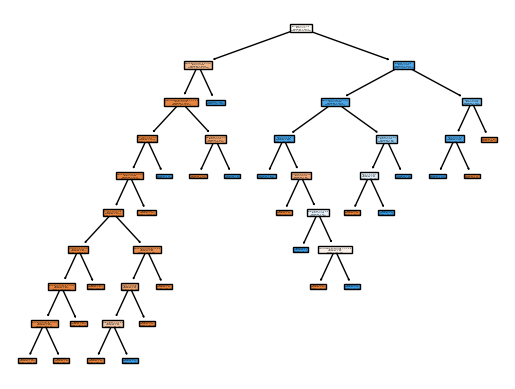

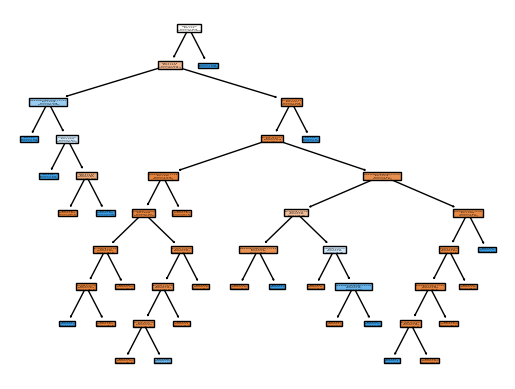

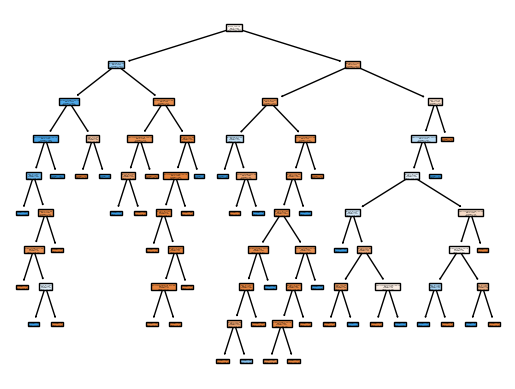

In [8]:
plot_tree(model[0],
          feature_names=X_train.columns,
          filled=True)
plt.show()

plot_tree(model[1],
          feature_names=X_train.columns,
          filled=True)
plt.show()

plot_tree(model[2],
          feature_names=X_train.columns,
          filled=True)
plt.show()

,feature_names,importance
0,odor_a,1.190524e-02
1,odor_c,9.705264e-03
2,odor_f,1.036749e-01
3,odor_l,1.277428e-02
4,odor_m,2.504447e-03
5,odor_n,2.039318e-01
6,odor_p,1.852973e-02
7,odor_s,1.938205e-03
8,odor_y,3.377424e-03
9,gill-size_b,7.103425e-02


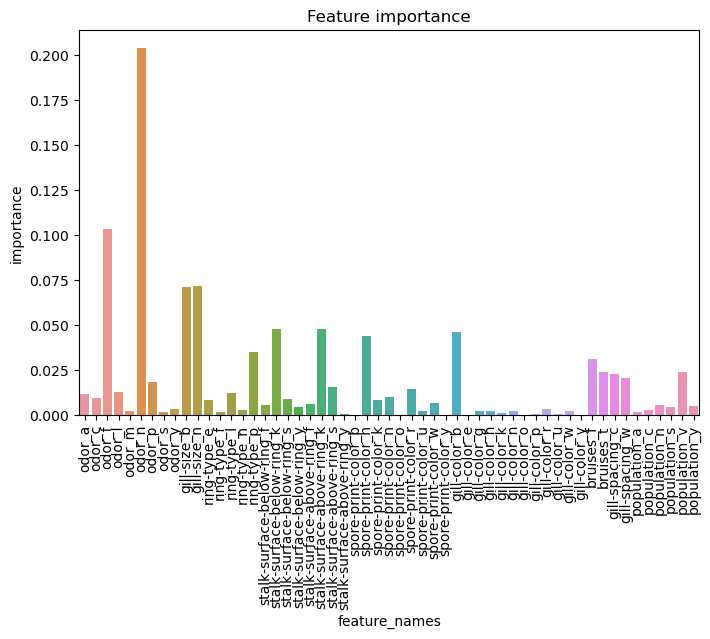

,n,train score,test score
0,487,0.993416,0.990301
1,974,0.998356,0.996714
2,1462,0.999863,0.999015
3,1949,0.999897,0.999672
4,2437,1.000000,1.000000
5,2924,1.000000,1.000000
6,3411,1.000000,1.000000
7,3899,1.000000,1.000000
8,4386,1.000000,1.000000
9,4874,0.999466,0.999343


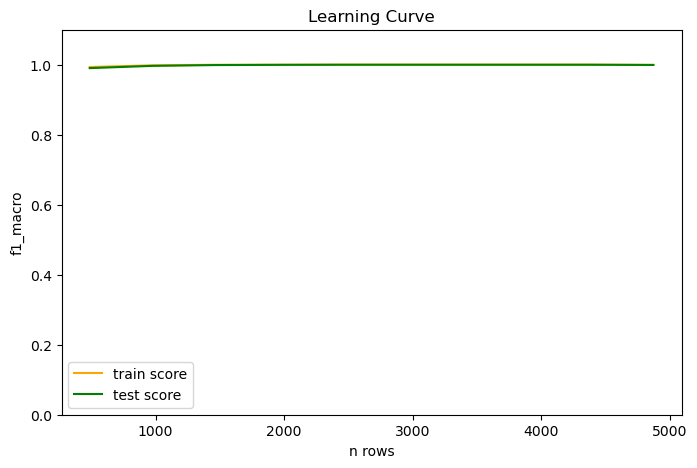

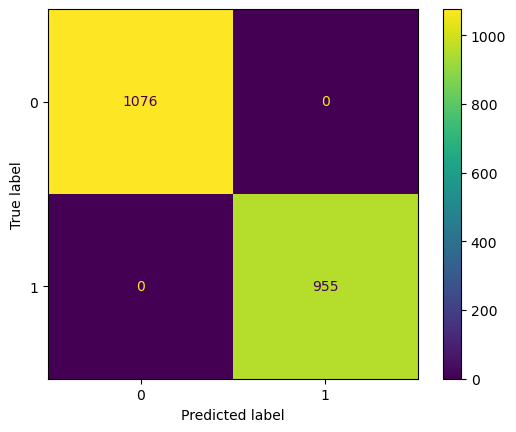

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1076
           p       1.00      1.00      1.00       955

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [9]:
give_f_imp(model,X_train)

give_learning_curve(model,X_train,y_train,scoring=scoring)

give_confusion_report(model,X_test,y_test)

In [10]:
import pickle

In [11]:
pickle.dump(model, open('model_red.pkl','wb')) #exporter 'model' sur le disque dur